# Logistic Regression Testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlvirtus import *

In [14]:
df = pd.read_csv('ex2data2.txt', header=None).to_numpy()

X = df[:,:-1]
y = df[:,-1:]
#add x intercept term
X = np.insert(X,0,1,axis=1)

In [15]:
model = LogisticRegression(alpha=.2,Lambda=1)

x1=X[:,1]
x2=X[:,2]

X = model.Feature_Mapping(x1,x2,6)

#initialize starting theta
init_theta = np.zeros((X.shape[1],1))

cost,gradients = model.Logistic_Regression_Cost(X,y,init_theta)

print("Cost at initial theta (zeros):",cost)
print("Gradients at initial theta(zeros):",gradients[0:5])


Cost at initial theta (zeros): 0.6931471805599454
Gradients at initial theta(zeros): [[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


In [16]:
init_theta = np.zeros((X.shape[1],1))
theta,cost_history = model.Gradient_Descent(X,y,init_theta)

print(theta)

[[ 1.2054486 ]
 [ 0.58277827]
 [ 1.13157717]
 [-1.92049484]
 [-0.83083409]
 [-1.28529448]
 [ 0.10198551]
 [-0.34262927]
 [-0.34146035]
 [-0.18124517]
 [-1.40981655]
 [-0.06607042]
 [-0.58045607]
 [-0.24620059]
 [-1.14693317]
 [-0.2432262 ]
 [-0.20118933]
 [-0.05872719]
 [-0.25855446]
 [-0.27176909]
 [-0.49104147]
 [-1.0159412 ]
 [ 0.01109511]
 [-0.28021768]
 [ 0.00479188]
 [-0.30981928]
 [-0.12608776]
 [-0.94027054]]


Text(0.5, 1.0, 'Cost Function Plot using Gradient Descent')

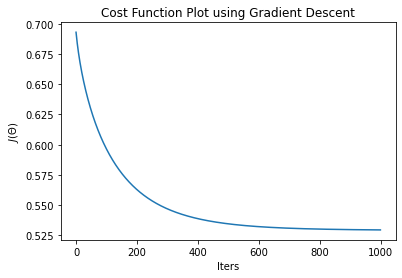

In [17]:
plt.plot(cost_history)
plt.xlabel("Iters")
plt.ylabel("$J(\Theta)$")
plt.title("Cost Function Plot using Gradient Descent")

In [18]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

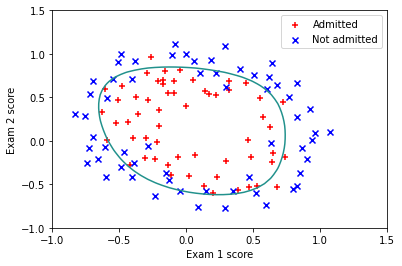

In [19]:
pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

# Plotting decision boundary
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [20]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [29]:
p=classifierPredict(theta,X)
correct = sum(p==y)

Accuracy = correct/len(y) * 100

Accuracy

array([83.05084746])